In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# importing raw data
df_eda = pd.read_csv("eda.csv")
# change "date" dtype to datetime with format %Y/%m/%d
df_eda['date'] = pd.to_datetime(df_eda['date'], format='%Y-%m-%d')
df_new = df_eda

df_new.fillna(0, inplace=True)

df_new.fillna({'waterfront': 0, 'sqrt_basement': 291.857, 'view': 0, 'yr_renovated': 0}, inplace=True)

df_numeric_new = df_new.select_dtypes(include='number')
corr_new = df_numeric_new.corr()
print(corr_new)




                sale_id     price        id  bedrooms  bathrooms  sqft_living  \
sale_id        1.000000  0.027436  0.006694  0.010030   0.107057     0.044874   
price          0.027436  1.000000 -0.016772  0.308787   0.525906     0.701917   
id             0.006694 -0.016772  1.000000  0.001150   0.005162    -0.012241   
bedrooms       0.010030  0.308787  0.001150  1.000000   0.514508     0.578212   
bathrooms      0.107057  0.525906  0.005162  0.514508   1.000000     0.755758   
sqft_living    0.044874  0.701917 -0.012241  0.578212   0.755758     1.000000   
sqft_lot      -0.027180  0.089876 -0.131911  0.032471   0.088373     0.173453   
floors         0.180026  0.256804  0.018608  0.177944   0.502582     0.353953   
waterfront    -0.007702  0.264306 -0.003599 -0.002127   0.063629     0.104637   
view          -0.013379  0.393497  0.011772  0.078354   0.186016     0.281715   
condition     -0.095654  0.036056 -0.023803  0.026496  -0.126479    -0.059445   
grade          0.082312  0.6

In [12]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

fig = px.imshow(
    corr_new,
    text_auto=True,
    height=1200,  # bigger
    width=1200,   # bigger
    color_continuous_midpoint=0.0,
    range_color=[-1, 1],
    title="Correlation Matrix"
)


fig.show()


# Hypothesis 1 : Houses located closer to the city center have higher prices than those far away. 

In [ ]:
import plotly.express as px

# Make sure you are in Jupyter Notebook or JupyterLab
# This keeps the plot inline
import plotly.io as pio
#pio.renderers.default = "notebook"  # or "notebook_connected"
pio.renderers.default = "browser"
df_new['price_bin'] = pd.qcut(df_new['price'], q=6, labels=False)

fig = px.scatter_mapbox(
    df_new,
    lat='lat',
    lon='long',
    color='price_bin',
    hover_data=['price', 'zipcode'],
    zoom=10,
    height=1000,
    title='Seattle Price Map',
    color_continuous_scale='Turbo'
)


fig.update_layout(mapbox_style="open-street-map")  # street map style
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


In [ ]:
city_center_lat = 47.6062
city_center_lon = -122.3321






In [ ]:
import numpy as np

def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return R * c


# Compute distance from city center (in km)
df_new["distance_from_center_km"] = haversine_km(
    city_center_lat,
    city_center_lon,
    df_new["lat"].values,
    df_new["long"].values
)

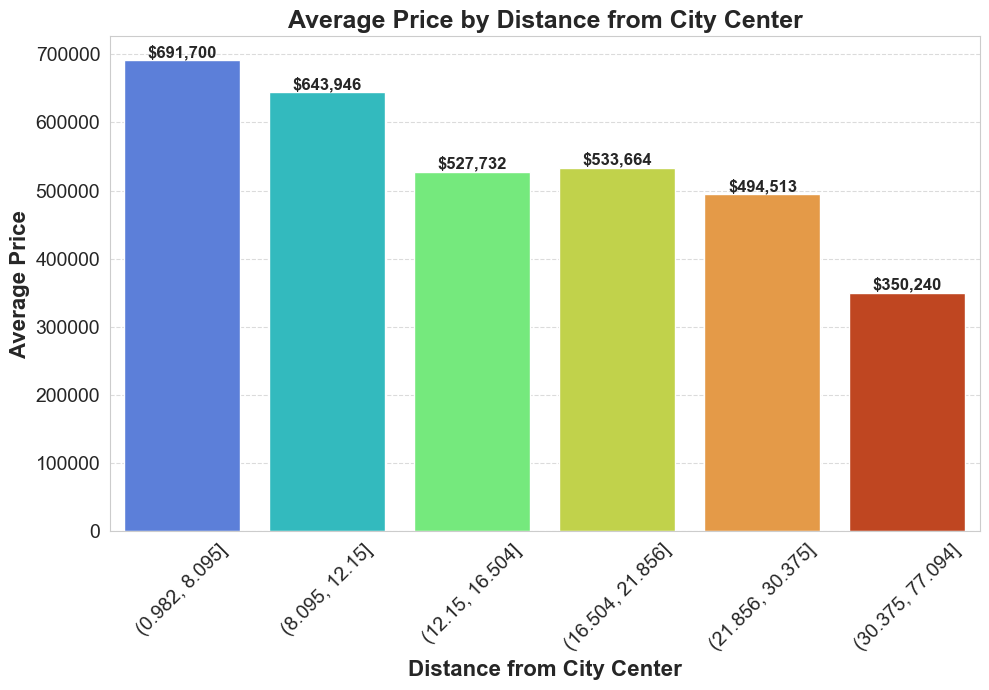

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create distance groups
df_new["distance_group"] = pd.qcut(df_new["distance_from_center_km"], q=6)

# Calculate average price per group
avg_price = df_new.groupby("distance_group")["price"].mean().reset_index()

plt.figure(figsize=(10,7))

sns.barplot(
    data=avg_price,
    x="distance_group",
    y="price",
    palette="turbo"
)

# Add value labels
for i, value in enumerate(avg_price["price"]):
    plt.text(i, value, f"${value:,.0f}",
             ha='center', va='bottom',
             fontsize=12, fontweight='bold')

plt.xlabel("Distance from City Center", fontsize=16, fontweight='bold')
plt.ylabel("Average Price", fontsize=16, fontweight='bold')
plt.title("Average Price by Distance from City Center", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
df_new["distance_from_center_km"].corr(df_new["price"])

np.float64(-0.28667959549019834)

# Hypothesis 2 :  Homes with larger living  sizes have higher prices, independent of house size.

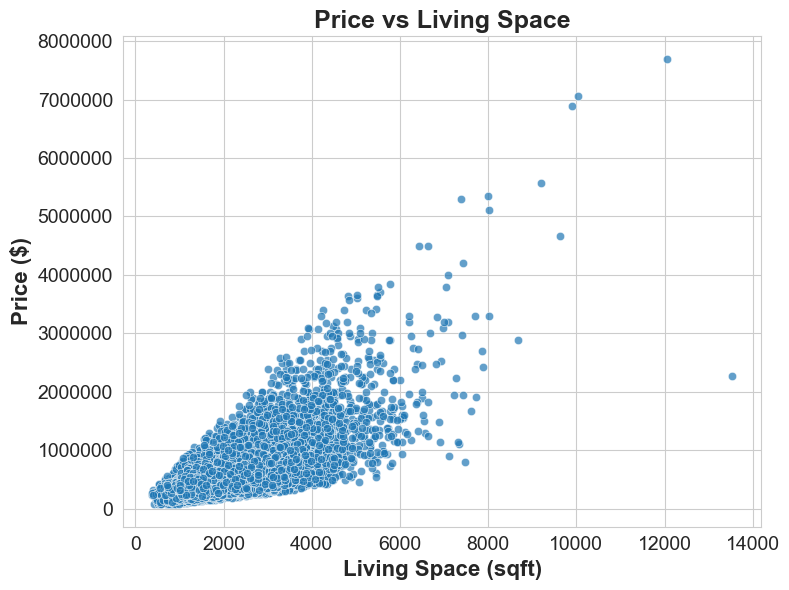

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='sqft_living',
    y='price',
    data=df_new,
    alpha=0.7
)

plt.title("Price vs Living Space",fontsize=18, fontweight='bold')
plt.xlabel("Living Space (sqft)",fontsize=16, fontweight='bold')
plt.ylabel("Price ($)", fontsize=16, fontweight='bold')

# Let matplotlib auto-locate x and y ticks to avoid duplicate 0
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

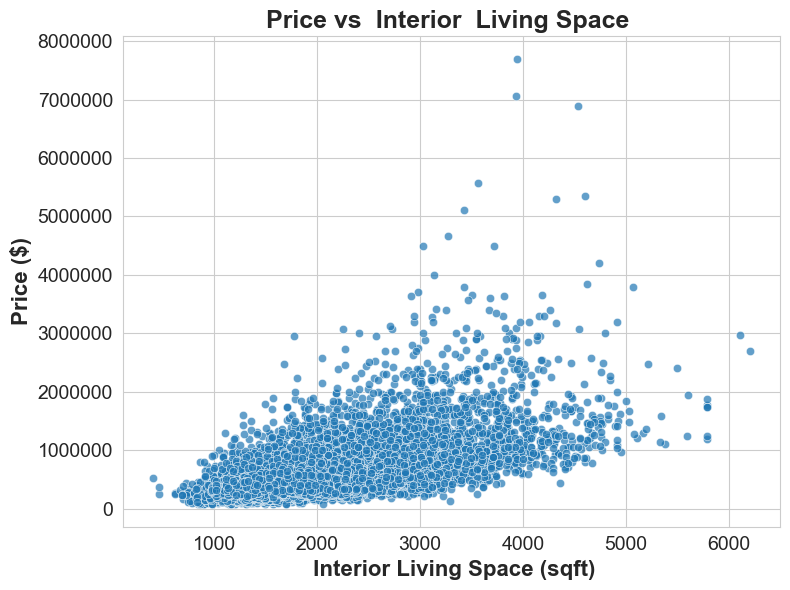

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='sqft_living15',
    y='price',
    data=df_new,
    alpha=0.7
)

plt.title("Price vs  Interior  Living Space ",fontsize=18, fontweight='bold')
plt.xlabel(" Interior Living Space (sqft)", fontsize=16, fontweight='bold')
plt.ylabel("Price ($)", fontsize=16, fontweight='bold')

# Let matplotlib auto-locate x and y ticks to avoid duplicate 0
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Disable scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

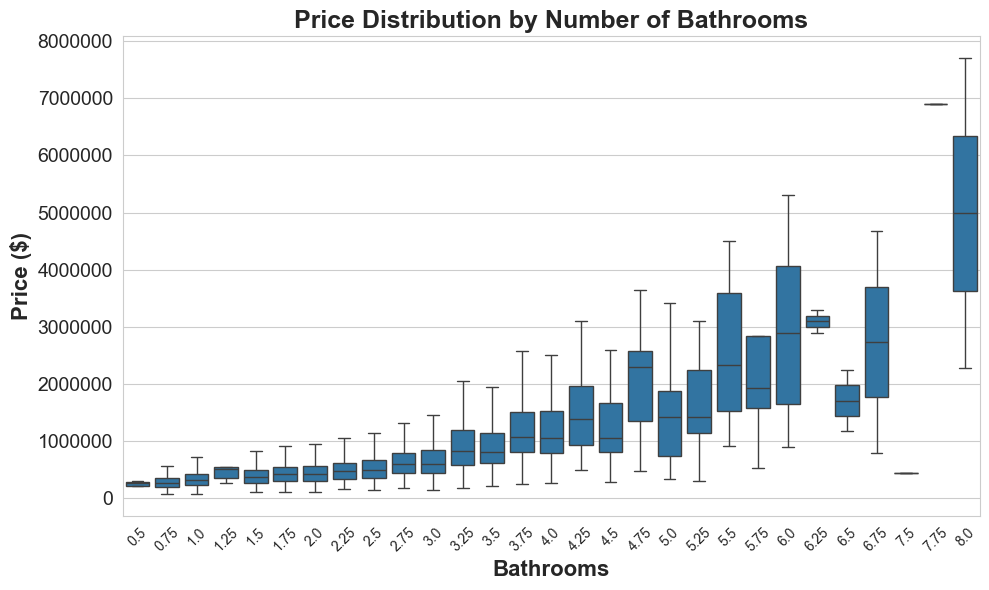

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(
    x='bathrooms',
    y='price',
    data=df_new,
    showfliers=False
)


plt.title("Price Distribution by Number of Bathrooms", fontsize=18, fontweight='bold')
plt.xlabel("Bathrooms", fontsize=16, fontweight='bold')
plt.ylabel("Price ($)", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=14)
# Disable scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

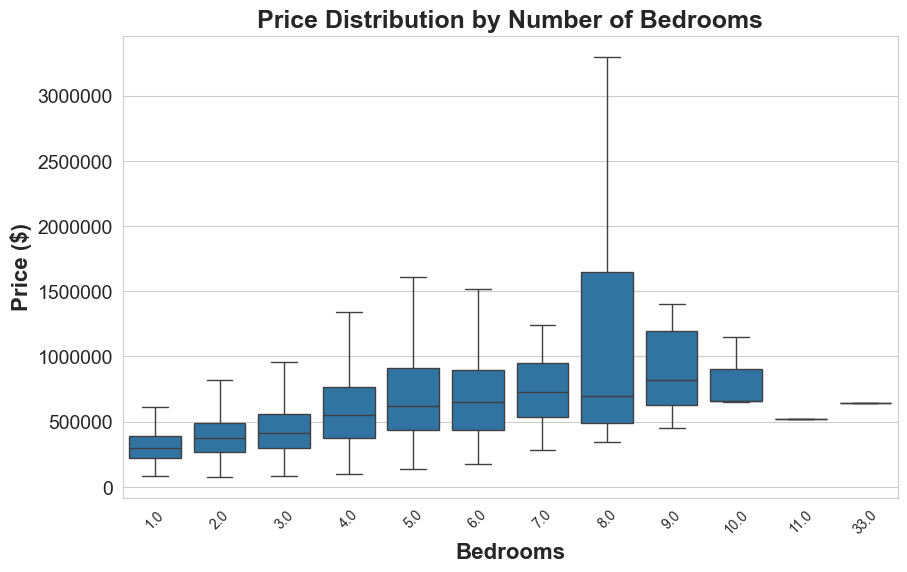

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(
    x='bedrooms',
    y='price',
    data=df_new,
    showfliers=False
)


plt.title("Price Distribution by Number of Bedrooms" , fontsize=18, fontweight='bold')
plt.xlabel("Bedrooms", fontsize=16, fontweight='bold')
plt.ylabel("Price ($)", fontsize=16, fontweight='bold')
# Disable scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
import plotly.express as px

# Make sure you are in Jupyter Notebook or JupyterLab
# This keeps the plot inline
import plotly.io as pio
#pio.renderers.default = "notebook"  # or "notebook_connected"
pio.renderers.default = "browser"

bins = [0, 6, 9, 13]               # Define grade edges
labels = ['Low', 'Medium', 'High'] # Labels for bins
df_new['grade_bin'] = pd.cut(df_new['grade'], bins=bins, labels=labels)

fig = px.scatter_mapbox(
    df_new,
    lat='lat',
    lon='long',
    color='grade_bin',
    hover_data=['price', 'zipcode'],
    zoom=10,
    height=1000,
    title='Seattle Price Map',
    color_continuous_scale='Plasma'
)


fig.update_layout(mapbox_style="open-street-map")  # street map style
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
fig.write_html("price_vs_distance.html", include_plotlyjs="cdn")





In [ ]:
import pandas as pd

# Example: df['grade'] exists
bins = [0, 6, 9, 13]  # define edges
labels = ['Low', 'Medium', 'High']  # bin labels

df_new['grade_bin'] = pd.cut(df_new['grade'], bins=bins, labels=labels)

             count          mean            std       min       25%  \
grade_bin                                                             
Low         2308.0  2.952491e+05  123537.867932   78000.0  210000.0   
Medium     17654.0  5.058017e+05  244859.083806   90000.0  335000.0   
High        1635.0  1.258670e+06  707372.117723  316000.0  812750.0   

                 50%        75%        max  
grade_bin                                   
Low         270000.0   358000.0  1200000.0  
Medium      454925.0   615000.0  3070000.0  
High       1040000.0  1490000.0  7700000.0  


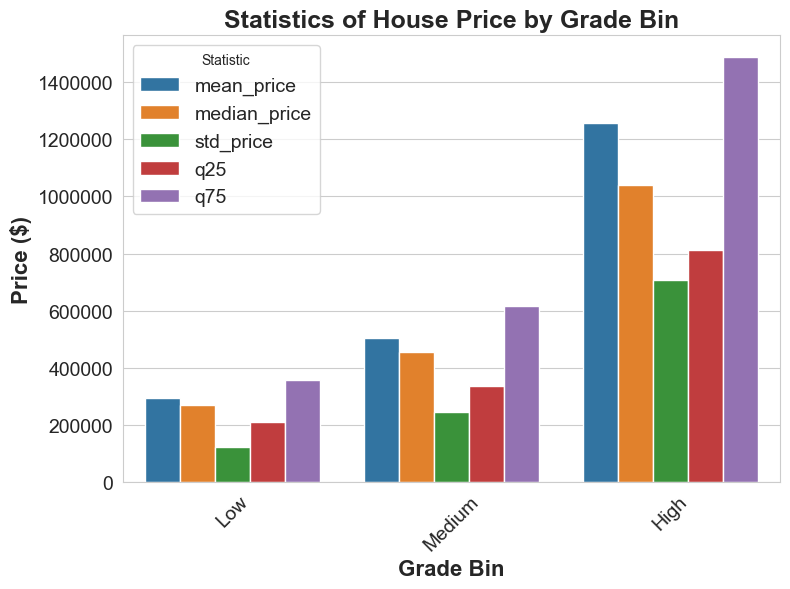

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
# df should have 'price' and 'grade' columns
# df = pd.read_csv('your_data.csv')

# 1️⃣ Bin the grades
bins = [0, 6, 9, 13]               # Define grade edges
labels = ['Low', 'Medium', 'High'] # Labels for bins
df_new['grade_bin'] = pd.cut(df_new['grade'], bins=bins, labels=labels)

# 2️⃣ Aggregate by median price
summary = df_new.groupby('grade_bin')['price'].describe()
print(summary)

summary = df_new.groupby('grade_bin')['price'].agg(
    mean_price='mean',
    median_price='median',
    std_price='std',
    q25=lambda x: x.quantile(0.25),
    q75=lambda x: x.quantile(0.75)
).reset_index()

#print(summary)


# Set Seaborn style
sns.set_style("whitegrid")


summary_melted = summary.melt(
    id_vars='grade_bin',
    var_name='Statistic',
    value_name='Price'
)


plt.figure(figsize=(8,6))

sns.barplot(
    x='grade_bin',
    y='Price',
    hue='Statistic',
    data=summary_melted
)




plt.title("Statistics of House Price by Grade Bin",fontsize=18, fontweight='bold')
plt.xlabel("Grade Bin", fontsize=16, fontweight='bold')
plt.ylabel("Price ($)" , fontsize=16, fontweight='bold')
plt.legend(title="Statistic",  fontsize=14)
# Disable scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()









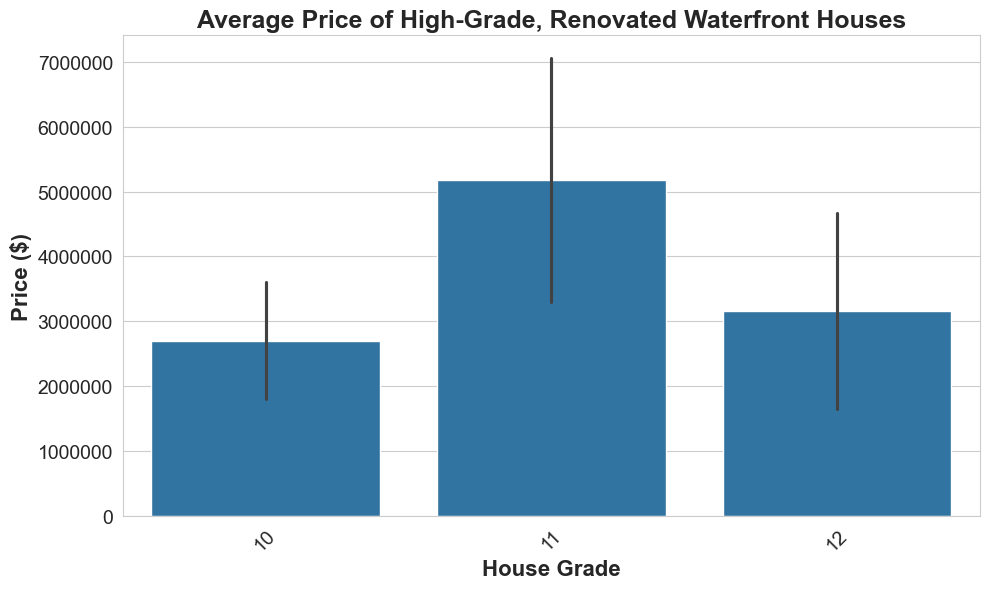

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define high grade threshold
high_grade_threshold = 10

# Filter:
# 1. Renovated houses
# 2. Waterfront houses
# 3. High grade houses
df_luxury = df_new[
    (df_new['yr_renovated'] > 0) &
    (df_new['waterfront'] == 1) &
    (df_new['grade'] >= high_grade_threshold)
].copy()

# Plot average price by grade (only luxury filtered data)
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_luxury,
    x='grade',
    y='price'
)

plt.title("Average Price of High-Grade, Renovated Waterfront Houses", fontsize=18, fontweight='bold')
plt.xlabel("House Grade", fontsize=16, fontweight='bold')
plt.ylabel("Price ($)", fontsize=16, fontweight='bold')
# Disable scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

import plotly.io as pio
#pio.renderers.default = "notebook"  # or "notebook_connected"
pio.renderers.default = "browser"
# Scale renovation data
df_new['yr_renovated_scaled'] = df_new['yr_renovated'] * 10

# Filter to only renovated + waterfront + high grade homes
high_grade_threshold = 10  # adjust as needed
df_filtered = df_new[
    (df_new['yr_renovated_scaled'] > 0) &
    (df_new['waterfront'] == 1) &
    (df_new['grade'] >= high_grade_threshold)
].copy()

# Create a Plotly map
fig = px.scatter_mapbox(
    df_filtered,
    lat="lat",
    lon="long",
    color="zipcode",
    size="price",
    hover_name="zipcode",
    hover_data={"price": True, "grade": True, "yr_renovated": True},
    zoom=10,
    height=600,
    title="Renovated Waterfront Houses with High Grade by Zipcode"
)

# Use an open tile map; you can use "open-street-map" or others
fig.update_layout(mapbox_style="open-street-map")

# Show the interactive map
fig.show()

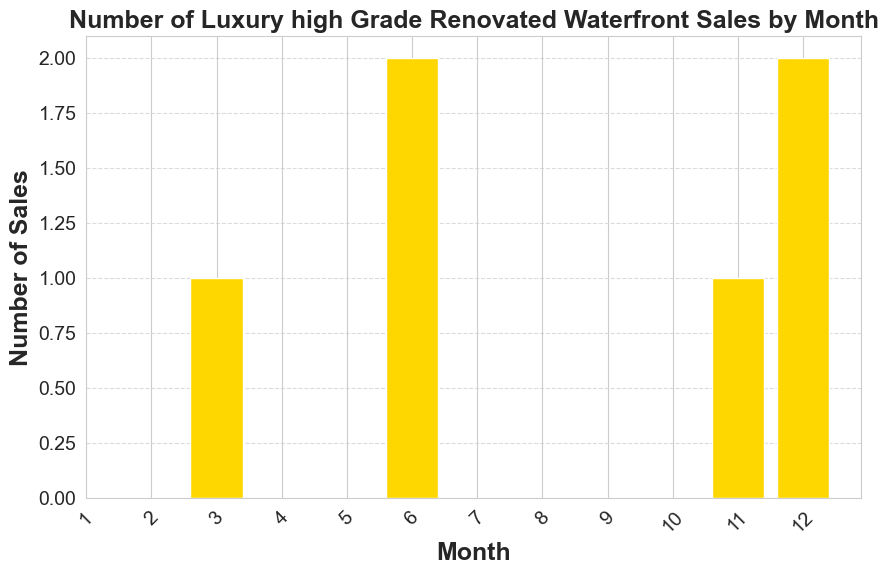

In [ ]:
df_filtered = df_new[(df_new['yr_renovated'] > 0) & (df_new['grade'] >= 10) & (df_new['waterfront'] == 1)]
df_filtered['month'] = df_filtered['date'].dt.month

sales_per_month_filtered = df_filtered['month'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(sales_per_month_filtered.index, sales_per_month_filtered.values, color='gold')
plt.title("Number of Luxury high Grade Renovated Waterfront Sales by Month",  fontsize=18, fontweight='bold')
plt.xlabel("Month",  fontsize=18, fontweight='bold')
plt.ylabel("Number of Sales",  fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(range(1,13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()